Example adding also the 16 nodes, clearly the accuracy goes down as we dont have many data

In [2]:
#Modules to install via pip pandas,ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pprint import pprint
import os
import import_ipynb
import sys
import kmeans
sys.path.append('../')
from functions import *
from pandas.plotting import scatter_matrix
import cmath as math
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
# scipy
from scipy.cluster.vq import kmeans,vq,whiten
import sklearn.metrics as sm
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline
import random
random.seed(6666)

In [5]:
dataList=coojaJsonImporter("../cooja-16nodes/traces/")

data=[]
cases=[
      "BH1",
        "BH2",
    "BH3",
    "normal"
      ]


"""
Importing test_1BH_P8_16nodes_2002019-01-29_21_40_55.json
Importing test_1BH_16nodes2018-11-09_19_46_22.json
Importing test_1BH_P8_16nodes_2002019-01-29_23_27_48.json
Importing test_norm_16nodes_5002019-01-29_18_56_03.json
Importing test_1BH_2018-11-09_12_31_25.json
Importing test_1BH_2018-11-09_14_37_46.json
Importing test_nom_2018-11-09_08_55_11.json
"""



BlackHole=[-1,4,5+8,-1]
#cases=["1BH","1BH","Norm"]
for nodeList in dataList:
    data.append(createNodes(nodeList))
data[0]=data[3]
data[2]=data[3]
#dataList=coojaJsonImporter("../cooja-9nodes/traces/")
#for nodeList in dataList:
#    data.append(createNodes(nodeList))
    
pings=getPings(data)    
d={ "label":[],
    "count":[],
    "std":  [],
    "mean": [],
    "var":  [],
    "25%":  [],
    "50%":[],
    "75%":[],
   "min":[],
   "max":[],
   "hop":[],
   "missing":[],
   "blackhole":[]
}

for i in range(len(data)):
    
    for j in range(len(data[i])):
        #n=len(data[i][j].pkts["rtt"])
        n=pings[i]
        #print(n)
        #window=n
        window=n
        
        for z in range(0,n,int(window)):
            node=data[i][j].pkts
            name=str(j)+" "+cases[i]
            nodeWindow=node[(node["pkt"]<z+window) & (node["pkt"]>=z)]["rtt"]
            #current=data[i][j].pkts['rtt'][z:z+window]
            #print(nodeWindow.shape)
            if(nodeWindow.count()<window/2): break
            d["label"].append(cases[i])
            d["count"].append(nodeWindow.count())
            missing=window-nodeWindow.count()
            d["missing"].append(missing)
            d["hop"].append(data[i][j].hop)
            d["std"].append(nodeWindow.std())
            d["mean"].append(nodeWindow.mean())
            d["var"].append(nodeWindow.var())
            
            #print(nodeWindow.describe()["25%"])
            d["25%"].append(nodeWindow.describe()["25%"])
            d["50%"].append(nodeWindow.describe()["50%"])
            d["75%"].append(nodeWindow.describe()["75%"])
            d["min"].append(nodeWindow.describe()["min"])
            d["max"].append(nodeWindow.describe()["max"])
            d["blackhole"].append("False")
            
            

            
            
#Transforming in dataframe            
stats=pd.DataFrame(d)
print(stats.shape)
stats=stats.dropna()
print(stats.shape)
data=stats.drop(["blackhole","missing","label","25%","75%","50%","min","max","mean","var"],axis=1)
print(data.head())
###Creating correction Array
correction=[]
#stats=stats.dropna()

col=np.array(stats["label"])

for i in range(len(col)):
    el=col[i]
    if el=="normal":
        correction.append(1)
    else:
        correction.append(0)
correction=np.array(correction)


####Doing kmeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_
print(data.columns)




accuracy=sm.accuracy_score(correction, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction, labels)

print(correction)
print(labels)
print(accuracy)
print(confusionMatrix)

Importing test_1BH_P8_16nodes_2002019-01-29_21_40_55.json
Importing test_1BH_16nodes2018-11-09_19_46_22.json
Importing test_1BH_P8_16nodes_2002019-01-29_23_27_48.json
Importing test_norm_16nodes_5002019-01-29_18_56_03.json
(51, 13)
(51, 13)
   count          std  hop
0    162   944.743823    3
1    163  1159.765813    3
2    164   530.744747    1
3    166   632.865393    1
4    163  1134.346199    4
Index(['count', 'std', 'hop'], dtype='object')
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.4117647058823529
[[ 6 30]
 [ 0 15]]


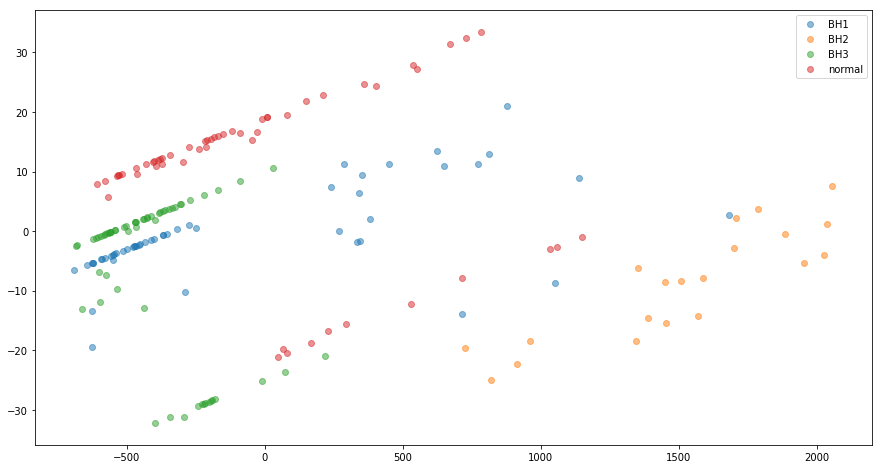

In [14]:
X = data
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = stats['label']
dfPCA.head()
labels = stats['label'].unique().tolist()
plt.figure(figsize=(15,8))
for lab in labels:
    #plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=50)
    plt.scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab, alpha=0.5)
    plt.legend()